Populating the interactive namespace from numpy and matplotlib
graph has been created
initializing the session...
training the model...


HBox(children=(IntProgress(value=0, max=50), HTML(value=u'')))

1   0.016420  0.014951  0.972414
2   0.014470  0.014241  0.958621
3   0.013949  0.013862  0.955172
4   0.013671  0.013581  0.920690
5   0.013445  0.013433  0.962069
6   0.013268  0.013306  0.941379
7   0.013118  0.013132  0.906897
8   0.012967  0.012965  0.927586
9   0.012821  0.012846  0.900000
10   0.012665  0.012595  0.879310
11   0.012539  0.012471  0.903448
12   0.012422  0.012390  0.906897
13   0.012307  0.012261  0.903448
14   0.012172  0.012130  0.903448
15   0.012071  0.012046  0.896552
16   0.011977  0.011949  0.893103
17   0.011874  0.011837  0.913793
18   0.011781  0.011773  0.934483
19   0.011677  0.011607  0.906897
20   0.011583  0.011578  0.917241
21   0.011503  0.011473  0.927586
22   0.011418  0.011383  0.920690
23   0.011339  0.011307  0.889655
24   0.011256  0.011274  0.903448
25   0.011191  0.011150  0.931034
26   0.011115  0.011118  0.934483
27   0.011048  0.011062  0.882759
28   0.010982  0.010988  0.913793
29   0.010923  0.010940  0.913793
30   0.010866  0.010920

HBox(children=(IntProgress(value=0, max=50), HTML(value=u'')))

1   0.010178  0.010149  0.875862
2   0.010132  0.010125  0.786207
3   0.010120  0.010120  0.831034
4   0.010119  0.010119  0.820690
5   0.010118  0.010120  0.868966
6   0.010118  0.010120  0.910345
7   0.010118  0.010120  0.875862
8   0.010118  0.010119  0.882759
9   0.010118  0.010119  0.900000
10   0.010118  0.010119  0.903448
11   0.010117  0.010119  0.889655
12   0.010117  0.010118  0.906897
13   0.010117  0.010119  0.913793
14   0.010117  0.010119  0.917241
15   0.010117  0.010119  0.955172
16   0.010117  0.010118  0.862069
17   0.010117  0.010118  0.896552
18   0.010116  0.010119  0.927586
19   0.010116  0.010118  0.910345
20   0.010116  0.010118  0.937931
21   0.010116  0.010117  0.934483
22   0.010116  0.010116  0.889655
23   0.010116  0.010118  0.920690
24   0.010116  0.010117  0.900000
25   0.010116  0.010116  0.913793
26   0.010116  0.010117  0.906897
27   0.010116  0.010117  0.931034
28   0.010115  0.010117  0.913793
29   0.010116  0.010117  0.906897
30   0.010115  0.010117

HBox(children=(IntProgress(value=0, max=50), HTML(value=u'')))

1   0.010109  0.010106  0.772414
2   0.010105  0.010104  0.644828
3   0.010103  0.010103  0.634483
4   0.010103  0.010103  0.724138
5   0.010103  0.010103  0.741379
6   0.010103  0.010103  0.772414
7   0.010103  0.010103  0.789655
8   0.010103  0.010103  0.803448
9   0.010102  0.010103  0.762069
10   0.010102  0.010103  0.824138
11   0.010102  0.010103  0.800000
12   0.010102  0.010103  0.831034
13   0.010102  0.010103  0.837931
14   0.010102  0.010102  0.817241
15   0.010102  0.010103  0.834483
16   0.010102  0.010103  0.848276
17   0.010102  0.010103  0.837931
18   0.010102  0.010103  0.841379
19   0.010102  0.010103  0.858621
20   0.010102  0.010103  0.834483
21   0.010102  0.010102  0.848276
22   0.010102  0.010103  0.841379
23   0.010102  0.010102  0.858621
24   0.010102  0.010103  0.875862
25   0.010102  0.010103  0.882759
26   0.010102  0.010103  0.875862
27   0.010102  0.010103  0.900000
28   0.010102  0.010103  0.882759
29   0.010102  0.010102  0.879310
30   0.010102  0.010102

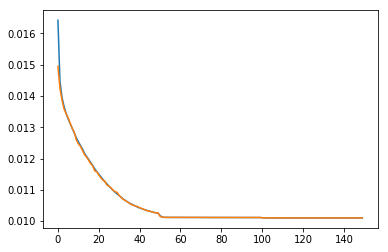

In [61]:
%pylab inline
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('max_columns',200)
from tqdm import tqdm_notebook as tqdm
import time

train = pd.read_csv('../rawdata/train.csv')

label_list = train.species.tolist()
label_to_str = {}
label_num = 0
for label_str in label_list:
    if label_str not in label_to_str:
        label_to_str[label_str] = label_num
        label_num += 1

label_num_list = [label_to_str[label_str] for label_str in label_list]

train['label'] = label_num_list
del train['species']

def label_to_one_hot(label_list):
    tmp_list = []
    col = max(label_list) + 1
    for label in label_list:
        row = [1 if idx == label else 0 for idx in range(col)]
        tmp_list.append(row)
    return np.array(tmp_list)

def one_hot_to_label(one_hot_array):
    tmp_list = []
    for row in one_hot_array:
        tmp_list.append(argmax(row))
    return np.array(tmp_list)

train_a = array(train[list(set(train.columns) - {'label','id'})])

label_one_hot = label_to_one_hot(label_num_list)

config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True  # 设置tf模式为按需增长模式

from pandas import DataFrame,Series

train_X = train_a[:700]
train_y = label_one_hot[:700]
test_X = train_a[700:]
test_y = label_one_hot[700:]

# images_data = load('../middata/experiment_data_10000sample/images_data_100pixel_hue_571.npy')
# labels = load('../middata/experiment_data_10000sample/labels_100000graph.npy')
# relations = load('../middata/experiment_data_10000sample/relations_100000graph.npy')

# Network Parameters
num_input = 192
num_classes = 99
keep_prob = 1

epochs = 50
banch = 1    # 每次组装banch的时候随机组装，是不是会有更好的效果
# all_mini_epochs = len(train_X)/banch
train_mini_epochs = len(train_X)/banch
# all_pair_num = len(relations)
# train_mini_epochs = all_mini_epochs
display_steps = 1
# model_index = 9


inputs_ = tf.placeholder(tf.float32,[None, num_input],name = 'inputs')
ys_ = tf.placeholder(tf.float32,[None,num_classes],name = 'labels')
keep_prob_ = tf.placeholder(tf.float32,name = 'keep')
learning_rate_ = tf.placeholder(tf.float32,name = 'learning_rate')


# Fully connected layer (in tf contrib folder for now)
fc1 = tf.layers.dense(inputs_, 1024)
# Apply Dropout (if is_training is False, dropout is not applied)
fc1 = tf.layers.dropout(fc1, rate=1-keep_prob)

fc1 = tf.layers.dense(fc1, 1024)
# Apply Dropout (if is_training is False, dropout is not applied)
fc1 = tf.layers.dropout(fc1, rate=1-keep_prob)

# Output layer, class prediction
logits = tf.layers.dense(fc1, num_classes)

loss = tf.reduce_mean(tf.abs(ys_ - logits))
    
optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(loss)

print 'graph has been created'

print 'initializing the session...'
init = tf.global_variables_initializer()
sess = tf.Session(config=config)
sess.run(init)

print 'training the model...'

mean_loss = []
mean_test_loss_list = []

def training(learning_rate,epochs=epochs,mean_loss=mean_loss):
    for epoch in tqdm(range(epochs)):
        loss_list = []
        for idx in range(train_mini_epochs):
            train_input = train_X[idx * banch : (idx + 1) * banch]
#             mini_relations = relations[idx*banch:(idx+1)*banch]
#             # 下面这个复杂的操作的目的仅仅是得到我想要的reshape(-1,100,100,2),如果直接reshape的话，顺序有问题
#             image = array([dstack((images_data[mini_relation[0]],images_data[mini_relation[1]])) \
#                                            for mini_relation in mini_relations]).reshape(-1,100,100,2)
            ys = train_y[idx*banch:(idx+1)*banch].reshape((banch,99))
            _, loss_ = sess.run([optimizer,loss],feed_dict={inputs_: train_input, ys_: ys, learning_rate_:learning_rate, keep_prob_:keep_prob})
            loss_list.append(loss_)
        mean_loss.append(mean(loss_list))
        if (epoch + 1) % display_steps == 0:
            test_tmp = testset_loss()
            print '%d   %f  %f  %f'%(epoch+1,mean_loss[-1],test_tmp[0], test_tmp[2])
    return mean_loss

def testset_loss():
    # 测试集的loss
#     print 'testset'
#     test_relations = load('../middata/experiment_data_10000sample/relations_3.npy')
#     test_mini_epochs = len(test_relations)
#     test_labels = load('../middata/experiment_data_10000sample/labels_3.npy')

#     start = time.clock()
    loss_list_test = []
    predict_error_num = 0 
    for idx in range(len(test_X)):
        
        
        ###  !!!!!这一步可能有问题检查！！！！！
#         image = dstack((images_data[test_relations[idx][0]],images_data[test_relations[idx][1]])).reshape(-1,100,100,2)
        test_input = test_X[idx].reshape((1,192))
        ys = test_y[idx].reshape(1,99)
#         ys = [[test_labels[idx]]]
        loss_, logit_predict = sess.run([loss,logits],feed_dict={inputs_: test_input, ys_: ys})
#         global logit_predict
#         global ys
        if one_hot_to_label(logit_predict) != one_hot_to_label(ys):
            predict_error_num += 1
        loss_list_test.append(loss_)

#     end = time.clock()
#     print 'mean:',mean(loss_list_test)
#     print 'std:',std(loss_list_test)
#     print 'time:',end-start
    error_rate = predict_error_num * 1.0 / len(test_X)
    mean_test_loss_list.append(mean(loss_list_test))
    return mean(loss_list_test),std(loss_list_test),error_rate

# mean_loss = training(learning_rate=0.001)
mean_loss = training(learning_rate=0.0001)
mean_loss = training(learning_rate=0.00001)
mean_loss = training(learning_rate=0.000001)

# saver = tf.train.Saver()
# model_name = 'CNN_' + str(model_index)
# save_path = saver.save(sess, '../models/'+model_name+'/save_net.ckpt')
# print("Save to path: ", save_path)

plot(mean_loss)
plot([i*display_steps for i in range(len(mean_test_loss_list))],mean_test_loss_list)

# # 训练集的loss
# print 'trainset'
# start = time.clock()
# loss_list_train = []
# for idx in range(train_mini_epochs):
#     image = dstack((images_data[relations[idx][0]],images_data[relations[idx][1]])).reshape(-1,100,100,2)
#     ys = [[labels[idx]]]
#     loss_ = sess.run(loss,feed_dict={inputs_: image, ys_: ys})
#     loss_list_train.append(loss_)

# end = time.clock()
# print 'mean:',mean(loss_list_train)
# print 'std:',std(loss_list_train)
# print 'time:',end-start
# print ''

# print testset_loss()[0]

In [48]:
test_tmp = testset_loss()
print '%f  %f  %f'%(mean_loss[-1],test_tmp[0], test_tmp[2])

0.022345  0.020487  0.000000


In [52]:
loss_list_test = []
predict_error_num = 0 
for idx in range(len(test_X)):


    ###  !!!!!这一步可能有问题检查！！！！！
#         image = dstack((images_data[test_relations[idx][0]],images_data[test_relations[idx][1]])).reshape(-1,100,100,2)
    test_input = test_X[idx].reshape((1,192))
    ys = test_y[idx].reshape(1,99)
#         ys = [[test_labels[idx]]]
    loss_, logit_predict = sess.run([loss,logits],feed_dict={inputs_: test_input, ys_: ys})
#         global logit_predict
#         global ys
    if one_hot_to_label(logit_predict) != one_hot_to_label(ys):
        predict_error_num += 1
    loss_list_test.append(loss_)

In [56]:
one_hot_to_label(ys)

array([13])

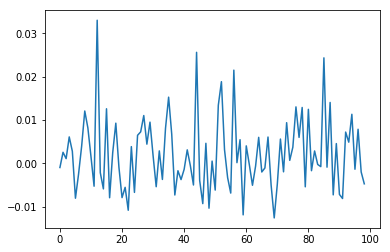

In [54]:
plot(logit_predict[0])

In [5]:
test = pd.read_csv('../rawdata/test.csv')

test_a = array(test[list(set(test.columns) - {'id'})])

In [51]:
test_a

array([[0.        , 0.015625  , 0.009766  , ..., 0.005859  , 0.001601  ,
        0.0014963 ],
       [0.007812  , 0.009766  , 0.042969  , ..., 0.003906  , 0.00050003,
        0.00048736],
       [0.023438  , 0.003906  , 0.003906  , ..., 0.037109  , 0.00070143,
        0.00073088],
       ...,
       [0.003906  , 0.009766  , 0.027344  , ..., 0.037109  , 0.00068331,
        0.00071153],
       [0.        , 0.017578  , 0.005859  , ..., 0.003906  , 0.00028218,
        0.00032127],
       [0.        , 0.001953  , 0.        , ..., 0.        , 0.00044042,
        0.00044974]])

In [7]:
predict_error_num = 0 
logit_predict_list = []
for idx in range(len(test_a)):
    test_input = test_a[idx].reshape((1,192))
    logit_predict = sess.run(logits,feed_dict={inputs_: test_input})
    logit_predict_list.append(logit_predict)

In [10]:
array(logit_predict_list).shape

(594, 1, 99)

In [13]:
array(logit_predict_list).reshape((594,99))

array([[ 0.00300943,  0.02253419,  0.00502501, ...,  0.01408193,
         0.00012528, -0.01575735],
       [-0.00012892,  0.01193654, -0.00190322, ...,  0.00725391,
        -0.00115622, -0.00908728],
       [-0.00978071,  0.00016995, -0.00978125, ...,  0.01030181,
        -0.00269787, -0.0023064 ],
       ...,
       [ 0.00194166,  0.00363469, -0.01344295, ..., -0.00043296,
        -0.0001294 , -0.00897134],
       [-0.00342687, -0.00697938,  0.00305746, ...,  0.02086497,
        -0.02989431,  0.00845444],
       [-0.01409659, -0.00761811, -0.00154593, ...,  0.00288904,
        -0.00513597, -0.00505724]], dtype=float32)

In [19]:
tmp = one_hot_to_label(array(logit_predict_list).reshape((594,99)))

In [21]:
test_string_label_list = [num_to_str[num] for num in tmp]

In [22]:
test_string_label_list

['Quercus_Vulcanica',
 'Quercus_Pontica',
 'Ulmus_Bergmanniana',
 'Rhododendron_x_Russellianum',
 'Ulmus_Bergmanniana',
 'Quercus_Afares',
 'Quercus_Pontica',
 'Tilia_Platyphyllos',
 'Tilia_Oliveri',
 'Rhododendron_x_Russellianum',
 'Pterocarya_Stenoptera',
 'Tilia_Tomentosa',
 'Viburnum_Tinus',
 'Acer_Rufinerve',
 'Quercus_Agrifolia',
 'Quercus_Greggii',
 'Tilia_Oliveri',
 'Acer_Mono',
 'Quercus_Brantii',
 'Tilia_Oliveri',
 'Quercus_Dolicholepis',
 'Quercus_Agrifolia',
 'Phildelphus',
 'Celtis_Koraiensis',
 'Ulmus_Bergmanniana',
 'Acer_Pictum',
 'Liquidambar_Styraciflua',
 'Tilia_Tomentosa',
 'Populus_Nigra',
 'Prunus_X_Shmittii',
 'Quercus_Agrifolia',
 'Pterocarya_Stenoptera',
 'Fagus_Sylvatica',
 'Quercus_Pontica',
 'Arundinaria_Simonii',
 'Eucalyptus_Glaucescens',
 'Quercus_Phillyraeoides',
 'Quercus_Agrifolia',
 'Acer_Platanoids',
 'Quercus_Afares',
 'Rhododendron_x_Russellianum',
 'Lithocarpus_Edulis',
 'Rhododendron_x_Russellianum',
 'Quercus_Canariensis',
 'Prunus_Avium',
 'Ace

In [24]:
submission = pd.read_csv('../rawdata/sample_submission.csv')

In [27]:
submission_cols = list(submission.columns)[1:]

In [28]:
submission_cols

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [31]:
submission_list = []
for predict in test_string_label_list:
    row = []
    for col in submission_cols:
        if col == predict:
            row.append(1)
        else:
            row.append(0)
    submission_list.append(row)
    
submission_a = array(submission_list)

In [35]:
id_list = submission['id'].tolist()

In [37]:
del submission['id']

In [38]:
submission = DataFrame(submission_a)

In [40]:
submission.columns = submission_cols

In [42]:
submission['id'] = id_list

In [44]:
del submission['id']

In [45]:
submission.insert(0,'id',id_list)

In [46]:
submission

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [47]:
submission.to_csv('../middata/submission_1.csv')

In [32]:
submission_a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
saver = tf.train.Saver()
model_name = 'MLP_insteresting'
save_path = saver.save(sess, '../models/'+model_name+'/save_net.ckpt')
print("Save to path: ", save_path)

('Save to path: ', '../models/MLP_insteresting/save_net.ckpt')
